# XGBoost implementation

In [2]:
# Packages and libraries
import pandas as pd
import xgboost as xgb

In [3]:
# XGBoost data prep
#remove white space in columns
#NOTE: GENDER_bin=1 is female and GENDER_bin=0 is males

df = pd.read_csv("df_sum_score_py.csv")
df.replace(' ','_',regex=True,inplace=True)

# there were 14 missing values, which has earlier been set to 0 in STRATUM. 
# Since this is only approximately 0.116% of the entire data, we do not need to do anything further. 
# XGBoost is very well at handling missing data, and we just need to ensure that it's set to 0. 
df.STRATUM.isin(['0']).sum()

14

In [4]:
# Splitting the data 
# X is the data which will be used to make predictions, and y contains the data we want to predict.
# We want to predict the score of the students in college, hence y_training and y_test is the college average grade. 

X = df.drop(['COL_GRADE_AVG','GENDER','Unnamed: 0','CR_S11','CC_S11','ENG_S11','CR_PRO','CC_PRO','ENG_PRO'], axis=1).copy()
y=df['COL_GRADE_AVG'].copy()

# Now we will continue to formatting X to make it suitable for making a model with XGBoost. 

In [5]:
# One-hot encoding 

# Look at the different types of data contained in each variable. 
X.dtypes

# The object columns we need to inspect to ensure that they are what we need them to be and after that we will do one-hot encoding. 
# One hot encoding is used to make the categorical varoiable STRATUM work in the model. 
# What is gonna happen is that the categorical variable is becoming multiple columns of binary values. 
# One hot encoding works great for trees and this is the motivation for using this method. 
X_encoded = pd.get_dummies(X,columns=['STRATUM'])


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=24, test_size=0.33)#, stratify=y)

In [7]:
# fra horse tut
# frames = [X_train, y_train]

# train_data = pd.concat([X_train, y_train], axis=1)
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) 
data_dmatrix

# Regressor

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [49]:
# XGBRegressor

model = xgb.XGBRegressor()#data_dmatrix, objective='reg:squarederror', seed=24)
print(model)
model.fit(X_train, y_train)
        # eval_set=[(X_test, y_test)],
        # eval_metric='logloss',
        # verbose=True)
    # X_train, y_train, verbose=True,early_stopping_rounds=10,eval_metric='mse',eval_set=[(X_test,y_test)])#,
            # verbose=True,
            # early_stopping_rounds=20)


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

TODO
- vi vil gerne lave parameter approximations med cross valdiation. Se eventuelt denne video https://www.youtube.com/watch?v=GrJP9FLV3FE
- 

# 10-fold cross validation

In [50]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.56


# Prediction

In [51]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 219.97
RMSE: 14.83


Muligvis skal vitage og concat y_test.index og y_pred for at få index på predictions. Så vi kan sorte dem og se om der er en bestemt tendens. 

In [63]:
# Prøve at sorte predictions med mergesort 
import numpy as np

pred_sorted = np.sort(y_pred, axis=- 1, kind='mergesort')[::-1]
pred_sorted


array([99.46211  , 99.32439  , 99.05359  , ...,  6.4798555,  6.4798555,
        4.773587 ], dtype=float32)

# Plotting

In [66]:
import matplotlib as mpl
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (20,10)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

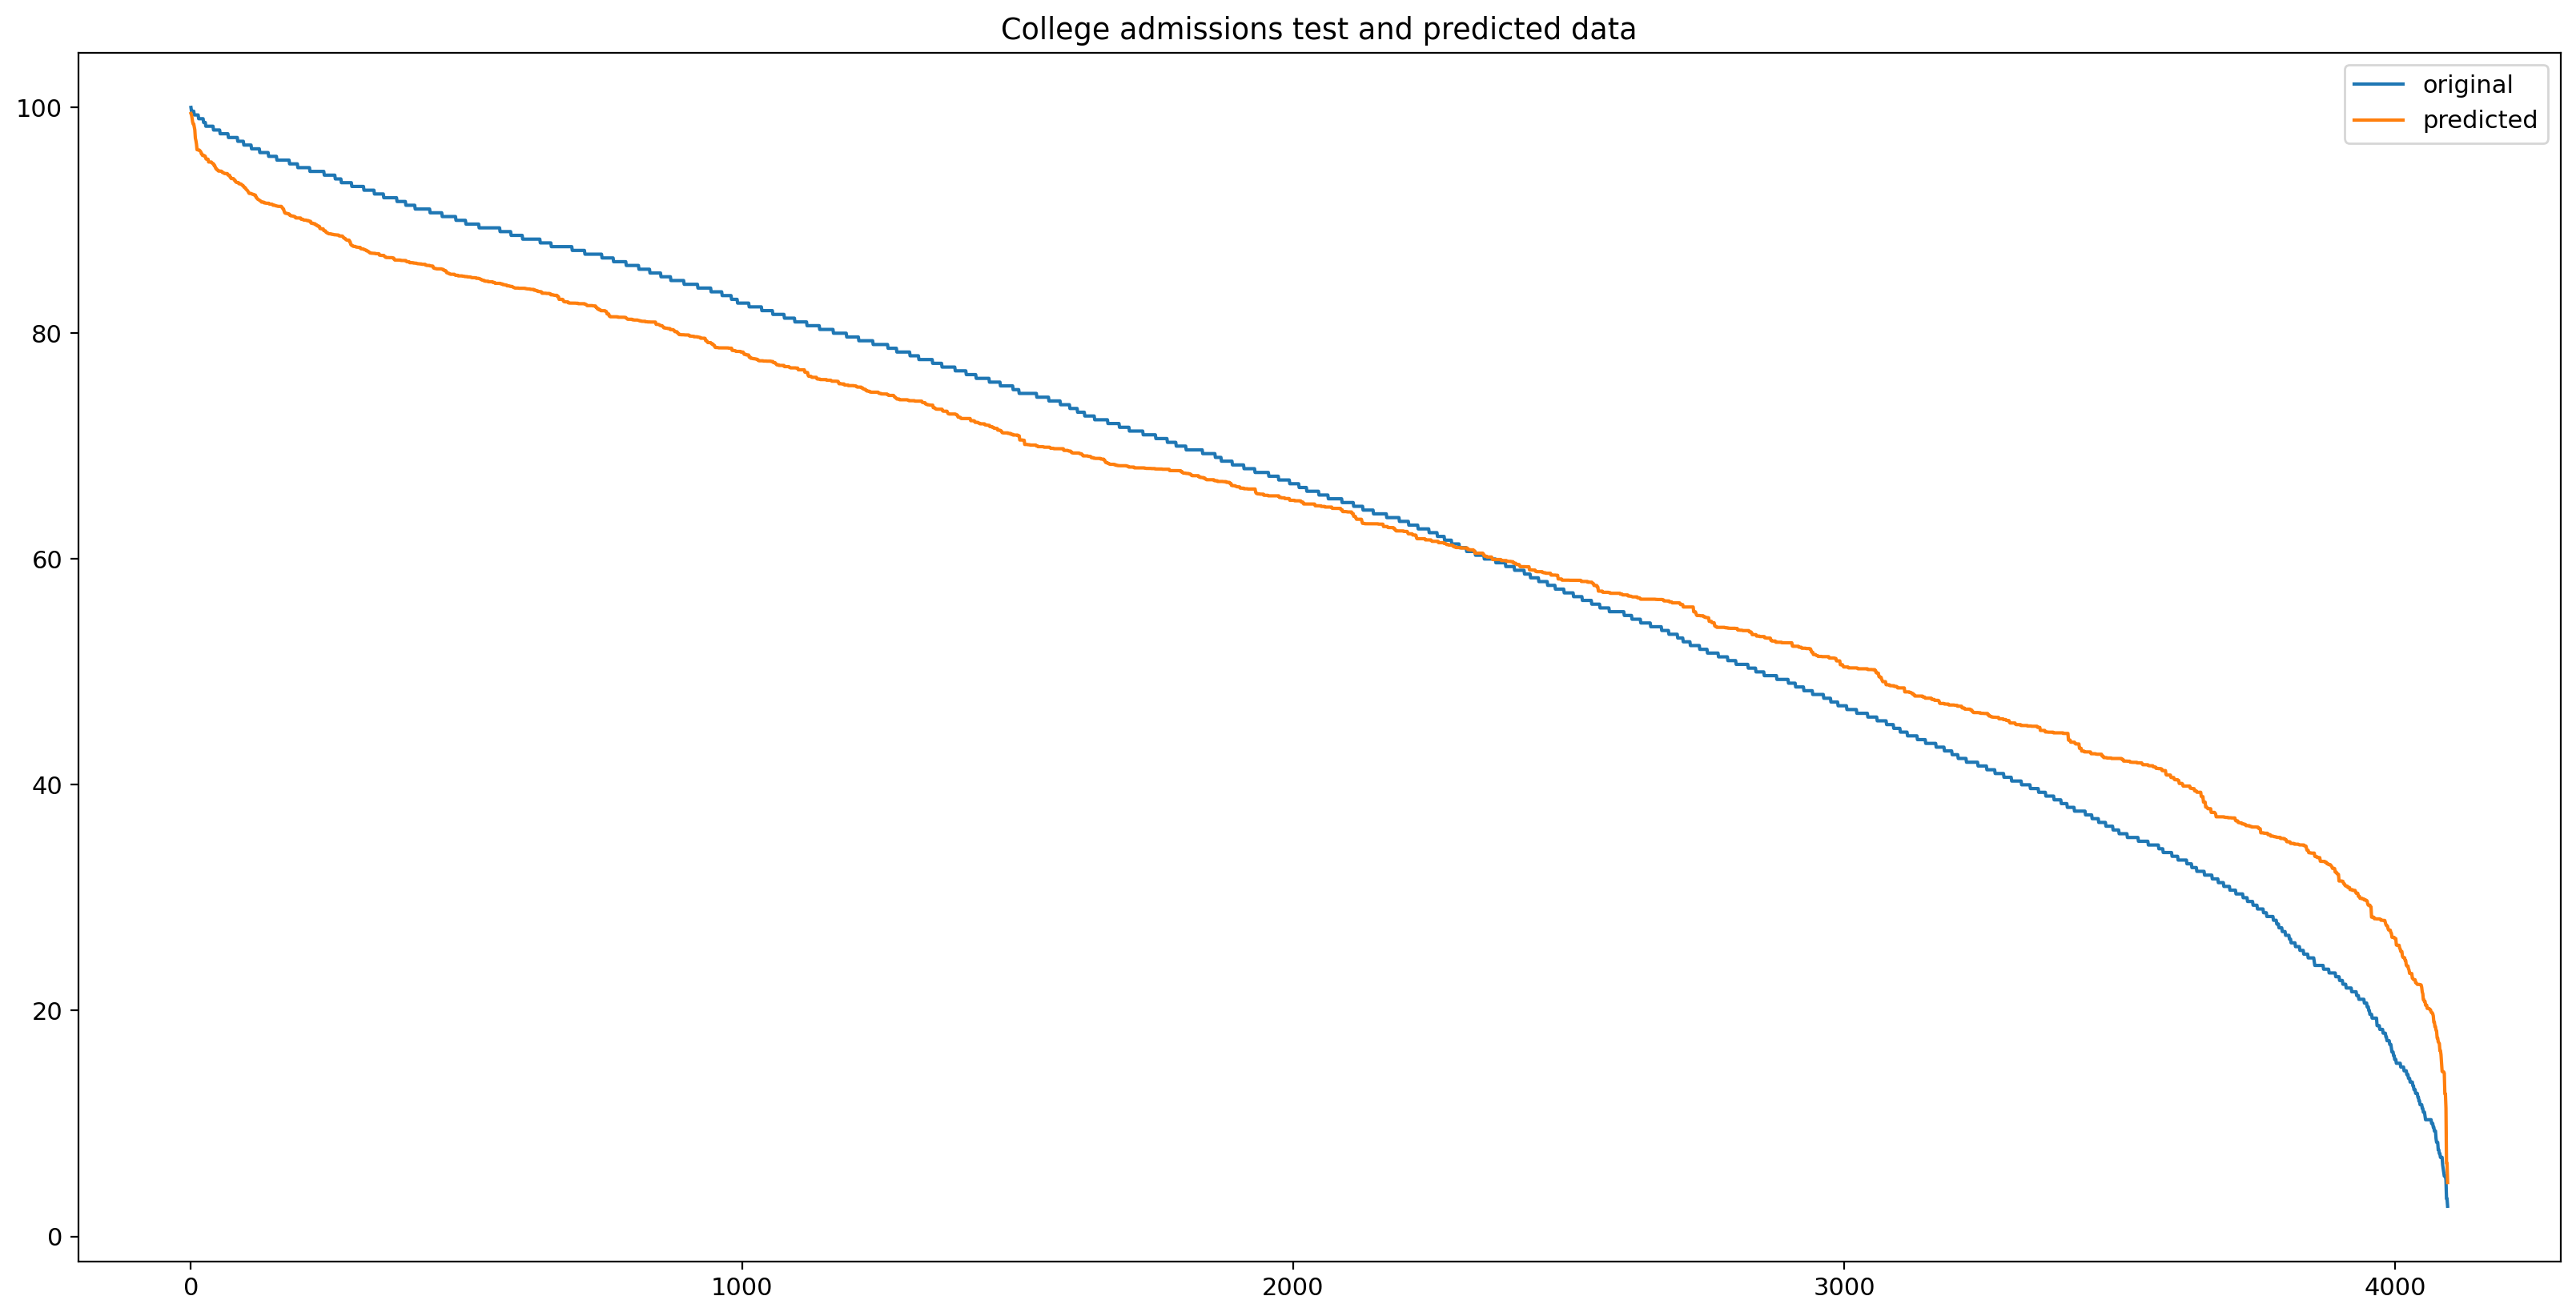

In [67]:

x_ax = range(len(y_test))
y_test_sorted = np.sort(y_test, axis=- 1, kind='mergesort')[::-1]
plt.plot(x_ax, y_test_sorted, label="original")
plt.plot(x_ax, pred_sorted, label="predicted")
plt.title("College admissions test and predicted data")
plt.legend()
plt.show()

In [50]:
preds = clf_xgb.predict(X_test)
preds

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32)

DETTE SER UD TIL AT VIRKE; MEN VI SKAL FINDE UD AF HVORDAN VI KAN DISPLAY RESULTATERNE!

In [29]:
# Maybe useful

# should be in reverse order of relevance score
# print( y_train[gbm.predict_proba(X)[:, 1].argsort()][::-1])

In [34]:
# Dette er fra horse tut
# Groups created 
groups = train_data.groupby(train_data.index.values).size().to_frame('size')['size'].to_numpy()

model = xgb.XGBRanker(  
    tree_method='gpu_hist',
    booster='gbtree',
    objective='rank:pairwise',
    random_state=42, 
    learning_rate=0.1,
    colsample_bytree=0.9, 
    eta=0.05, 
    max_depth=6, 
    n_estimators=110, 
    subsample=0.75 
    )

model.fit(X_train, y_train, group=groups, verbose=True)

XGBRanker(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=0.9, eta=0.05, gamma=0, gpu_id=0,
          importance_type='gain', interaction_constraints='', learning_rate=0.1,
          max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
          monotone_constraints='()', n_estimators=110, n_jobs=4,
          num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
          scale_pos_weight=None, subsample=0.75, tree_method='gpu_hist',
          validate_parameters=1, verbosity=None)

In [32]:
# model.fit(X_train,y_train)

preds = model.predict(X_test)
preds

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32)

In [ ]:
# 3-fold cross validation

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
                    

In [ ]:
cv_results.head()

In [18]:
from sklearn.model_selection import GroupShuffleSplit


gss = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 7).split(X, groups=X_encoded.index.values)
X_train_inds, X_test_inds = next(gss)

train_data= X_encoded.iloc[X_train_inds]
X_train = train_data.loc[:, ~train_data.columns.isin(['STRATUM','GENDER_bin','HI_GRADE_AVG'])]
y_train = train_data.loc[:, train_data.columns.isin(['COL_GRADE_AVG'])]
y_train

""
1
3
6
7
10
...
12397
12404
12407
12408


In [19]:
test_data= X_encoded.iloc[X_test_inds]
X_test = test_data.loc[:, ~test_data.columns.isin(['STRATUM','GENDER_bin','HI_GRADE_AVG'])]
y_test = test_data.loc[:, test_data.columns.isin(['COL_GRADE_AVG'])]



In [20]:

import xgboost as xgb

model = xgb.XGBRanker(  
    tree_method='gpu_hist',
    booster='gbtree',
    objective='rank:pairwise',
    random_state=42, 
    learning_rate=0.1,
    colsample_bytree=0.9, 
    eta=0.05, 
    max_depth=6, 
    n_estimators=110, 
    subsample=0.75 
    )

model.fit(X_train, y_train, group=groups, verbose=True)

XGBoostError: [14:42:22] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/data/data.cc:563: Check failed: group_ptr_.back() == num_row_ (8315 vs. 7446) : Invalid group structure.  Number of rows obtained from groups doesn't equal to actual number of rows given by data.

In [90]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['STRATUM','GENDER_bin','HI_GRADE_AVG'])])
    
# X_train = train_data.loc[:, ~train_data.columns.isin(['STRATUM','GENDER_bin','HI_GRADE_AVG'])]

test_data

,STRATUM,HI_GRADE_AVG,GENDER_bin
0,Stratum_4,74.666667,1
2,Stratum_2,43.000000,0
4,Stratum_4,77.666667,0
5,Stratum_6,66.333333,1
8,Stratum_2,53.666667,0
...,...,...,...
12402,Stratum_2,62.333333,1
12403,Stratum_3,63.000000,1
12405,Stratum_2,69.000000,0
12406,Stratum_2,73.333333,0


In [91]:

data = test_data
predictions = (data.groupby('STRATUM')
               .apply(lambda x: predict(model, x)))

ValueError: Feature shape mismatch, expected: 9, got 7

In [76]:
# https://github.com/foxtrotmike/xgbrank/blob/master/xgbranker.py
   
import xgboost
from xgboost import XGBModel
from xgboost import DMatrix, train
import numpy as np
class XGBRanker(XGBModel):
    __doc__ = """Implementation of sklearn API for XGBoost Ranking
           """ + '\n'.join(XGBModel.__doc__.split('\n')[2:])
    
    def __init__(self, max_depth=3, learning_rate=0.1, n_estimators=100, 
                 silent=True, objective="rank:pairwise", booster='gbtree',
                 n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
                 subsample=1, colsample_bytree=1, colsample_bylevel=1,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                 base_score=0.5, random_state=0, seed=None, missing=None, **kwargs): 
        
        super(XGBRanker, self).__init__(max_depth, learning_rate,
                                        n_estimators, silent, objective, booster,
                                        n_jobs, nthread, gamma, min_child_weight, max_delta_step, 
                                        subsample, colsample_bytree, colsample_bylevel,
                                        reg_alpha, reg_lambda, scale_pos_weight,
                                        base_score, random_state, seed, missing)


    def fit(self, X, y, group=None, eval_metric=None, sample_weight=None,
            early_stopping_rounds=None, verbose=True):
        """
        Fit the gradient boosting model
        Parameters
        ----------
        X : array_like
            Feature matrix
        y : array_like
            Labels
        group : list, optional
            Group number list. All X and y will be taken as single group when group is not provided. All ranking is valid only in their own group.
        sample_weight : array_like
            instance weights
        eval_set : list, optional
            A list of (X, y) tuple pairs to use as a validation set for
            early-stopping
        eval_metric : str, callable, optional
            If a str, should be a built-in evaluation metric to use. See
            doc/parameter.md. If callable, a custom evaluation metric. The call
            signature is func(y_predicted, y_true) where y_true will be a
            DMatrix object such that you may need to call the get_label
            method. It must return a str, value pair where the str is a name
            for the evaluation and value is the value of the evaluation
            function. This objective is always minimized.
        early_stopping_rounds : int
            Activates early stopping. Validation error needs to decrease at
            least every <early_stopping_rounds> round(s) to continue training.
            Requires at least one item in evals.  If there's more than one,
            will use the last. Returns the model from the last iteration
            (not the best one). If early stopping occurs, the model will
            have three additional fields: bst.best_score, bst.best_iteration
            and bst.best_ntree_limit.
            (Use bst.best_ntree_limit to get the correct value if num_parallel_tree
            and/or num_class appears in the parameters)
        verbose : bool
            If `verbose` and an evaluation set is used, writes the evaluation
            metric measured on the validation set to stderr.
        xgb_model : str
            file name of stored xgb model or 'Booster' instance Xgb model to be
            loaded before training (allows training continuation).
        """
        if group is None:
            group = [X.shape[0]]
        else:
            idx = np.argsort(group)
            X = X[idx,:]
            y = y[idx]
            group = group[idx]
            unique, counts = np.unique(group, return_counts=True)
            group = counts[np.argsort(unique)]
        
        params = self.get_xgb_params()
 
        if callable(self.objective):
            obj = _objective_decorator(self.objective)
            # Use default value. Is it really not used ?
            xgb_options["objective"] = "rank:pairwise"
        else:
            obj = None
        
        evals_result = {}
        feval = eval_metric if callable(eval_metric) else None
        if eval_metric is not None:
            if callable(eval_metric):
                eval_metric = None
            else:
                params.update({'eval_metric': eval_metric})

        if sample_weight is not None:
            train_dmatrix = DMatrix(X, label=y, weight=sample_weight,
                                    missing=self.missing)
        else:
            train_dmatrix = DMatrix(X, label=y,
                                    missing=self.missing)
        train_dmatrix.set_group(group)
        
        self.objective = params["objective"]

        self._Booster = train(params, train_dmatrix, 
                              self.n_estimators,
                              early_stopping_rounds=early_stopping_rounds,
                              evals_result=evals_result, obj=obj, feval=feval,
                              verbose_eval=verbose,
                              xgb_model=None)

        
        if evals_result:
            for val in evals_result.items():
                evals_result_key = list(val[1].keys())[0]
                evals_result[val[0]][evals_result_key] = val[1][evals_result_key]
            self.evals_result = evals_result

        if early_stopping_rounds is not None:
            self.best_score = self._Booster.best_score
            self.best_iteration = self._Booster.best_iteration
            self.best_ntree_limit = self._Booster.best_ntree_limit

        return self

    def predict(self, X, group=None, output_margin=False, ntree_limit=0):
        unsort = (group is not None)
        if group == None:
            group = [X.shape[0]]            
        else:
            idx = np.argsort(group)
            X = X[idx,:]
            group = group[idx]
            unique, counts = np.unique(group, return_counts=True)
            group = counts[np.argsort(unique)]
            
        test_dmatrix = DMatrix(X, missing=self.missing)
        test_dmatrix.set_group(group)
        rank_values = self.get_booster().predict(test_dmatrix,
                                                 output_margin=output_margin,
                                                 ntree_limit=ntree_limit)
        if unsort:
            rank_values=rank_values[np.argsort(idx)]
        return rank_values



In [78]:
XGBModel.fit(X_train, y_train, eval_metric=None, sample_weight=None,early_stopping_rounds=None, verbose=True)

TypeError: fit() missing 1 required positional argument: 'y'

In [52]:
import xgboost as xgb
from xgboost import DMatrix

group_train = []
with open(X_train, "r") as f:
    data = f.readlines()
    for line in data:
        group_train.append(int(line.split("\n")[0]))

group_valid = []
with open("mq2008.vali.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_valid.append(int(line.split("\n")[0]))

group_test = []
with open("mq2008.test.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_test.append(int(line.split("\n")[0]))

train_dmatrix = DMatrix(X_train, y_train)
valid_dmatrix = DMatrix(X_test, y_test)
test_dmatrix = DMatrix(x_test)

train_dmatrix.set_group(group_train)
valid_dmatrix.set_group(group_valid)

params = {'objective': 'rank:ndcg', 'eta': 0.1, 'gamma': 1.0,
          'min_child_weight': 0.1, 'max_depth': 6}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=4,
                      evals=[(valid_dmatrix, 'validation')])
pred = xgb_model.predict(test_dmatrix)

FileNotFoundError: [Errno 2] No such file or directory: 'mq2008.train.group'